
2109106102
Adhitya Saputra
POSTTEST 6

Import Library


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from your_module_name import Custom_callback


Membaca dataset

In [31]:
dataset = pd.read_csv('Corona_NLP_test.csv')
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


Dataset  dipangkas menjadi 3000 baris secara acak

In [137]:
n = 3000
if len(dataset) > n:
    random_indices = np.random.choice(len(dataset), n, replace=False)
    dataset = dataset.iloc[random_indices]

dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1804,1805,46757,"Atlanta, GA",13-03-2020,Is there a hashtag for helping folks who WEREN...,Positive
3377,3378,48330,"??????????, ???",16-03-2020,email I just got from my grocery store:\r\r\n#...,Extremely Positive
3776,3777,48729,"Toronto, Ontario, Canada",16-03-2020,The GLB Retail Store / Taproom is CLOSED today...,Extremely Positive
62,63,45015,Five offices across Canada,10-03-2020,"""As the novel #coronavirus (or #COVID19) conti...",Extremely Positive
1464,1465,46417,"iPhone: 41.376335,2.18889",13-03-2020,Just been to the supermarket. Why do all women...,Neutral
...,...,...,...,...,...,...
2815,2816,47768,Brighton,15-03-2020,Dog food appeal Food shortages due to are beco...,Extremely Positive
489,490,45442,Kosovo,12-03-2020,PSA ON INCREASED PRICES IN STORES\r\r\n\r\r\nI...,Extremely Positive
3391,3392,48344,"English Riviera, West Midlands",16-03-2020,#Covid-19 keeps the Leavers happy with immigra...,Positive
1671,1672,46624,"New York, USA",13-03-2020,"Asian Flu, Avian Flu, SARS, CoVid-19- despite ...",Extremely Negative



Memisahkan fitur dan target

In [138]:
X = dataset.drop('ScreenName', axis=1) 
y = dataset['ScreenName']


Menggunakan label encoding untuk mengubah variabel target "ScreenName" menjadi 1 dan 0

In [140]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


Split dataset menjadi train dan test

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


Memisahkan kolom-kolom numerik dan kategorikal

In [142]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

Menggunakan OneHotEncoder dengan handle_unknown='ignore' pada kolom kategorikal

In [143]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Mengkodekan kolom data kategorikal pada X_train dan X_test

In [144]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])


Mengonversi seluruh dataset (fitur dan target) ke float32

In [167]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


Membuat Sequential model

In [159]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=2329, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [160]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               298240    
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 16)                528       
                                                                 
 dense_56 (Dense)            (None, 1)                 17        
                                                                 
Total params: 309121 (1.18 MB)
Trainable params: 309121 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Mengompilasi model

In [161]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

     

In [162]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True


Melatih model

In [164]:
kolbek = MyCallback()
history = model.fit(
        X_train_encoded, 
        y_train, 
        epochs=10, 
        batch_size=32, 
        validation_data=(X_test_encoded, y_test),
        callbacks=[kolbek]
    )


Epoch 1/10
47/47 [==============================] - 0s 9ms/step - loss: -43880452502585344.0000 - accuracy: 0.0000e+00 - val_loss: -42666321082580992.0000 - val_accuracy: 6.6667e-04
Epoch 2/10
47/47 [==============================] - 0s 8ms/step - loss: -44376203397693440.0000 - accuracy: 0.0000e+00 - val_loss: -43147129786466304.0000 - val_accuracy: 6.6667e-04
Epoch 3/10
47/47 [==============================] - 0s 7ms/step - loss: -44875282892455936.0000 - accuracy: 0.0000e+00 - val_loss: -43633676566659072.0000 - val_accuracy: 6.6667e-04
Epoch 4/10
47/47 [==============================] - 0s 8ms/step - loss: -45381118370775040.0000 - accuracy: 0.0000e+00 - val_loss: -44117831050067968.0000 - val_accuracy: 6.6667e-04
Epoch 5/10
47/47 [==============================] - 0s 8ms/step - loss: -45886700446023680.0000 - accuracy: 0.0000e+00 - val_loss: -44618997898936320.0000 - val_accuracy: 6.6667e-04
Epoch 6/10
47/47 [==============================] - 0s 7ms/step - loss: -46401602600304640


Evaluasi model

In [165]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

47/47 [==============================] - 0s 1ms/step - loss: -47144726431793152.0000 - accuracy: 6.6667e-04
Test loss: -4.714472643179315e+16
Test accuracy: 0.0006666666595265269



Menampilkan grafik model loss dan model accuracy, baik pada training maupun validation

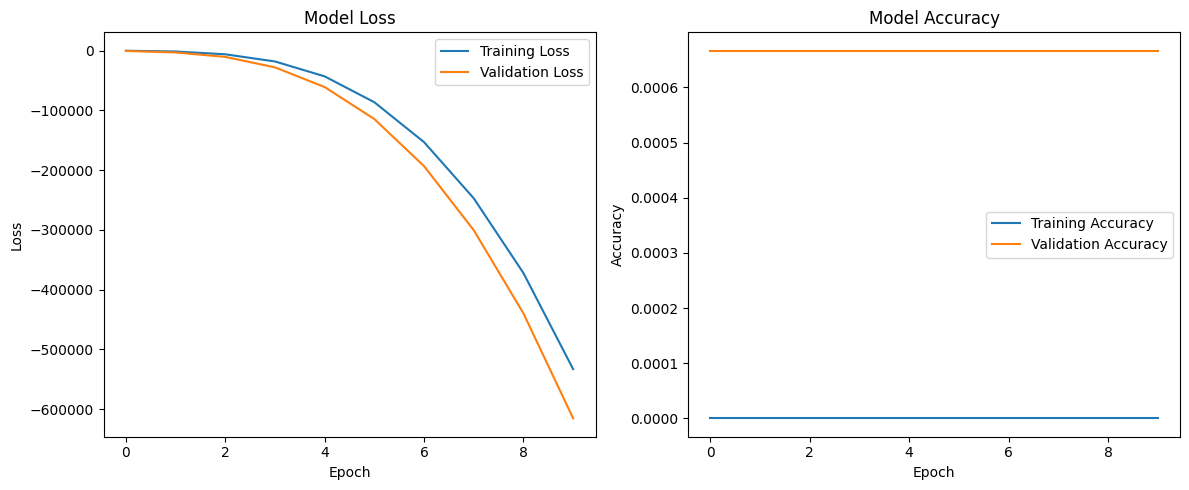

In [158]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()